In [132]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [133]:
#my first deep neural network with pytorch :D

class Net(nn.Module):
    
    def __init__(self, d_in, d_hidden1, d_hidden2, d_out):
        super().__init__()
        #self.n_batch = n_batch
        self.d_in = d_in
        self.d_hidden1 = d_hidden1
        self.d_hidden2 = d_hidden2
        self.d_out = d_out
        
        self.fc1 = nn.Linear(self.d_in, self.d_hidden1)
        self.fc2 = nn.Linear(self.d_hidden1, self.d_hidden2)
        self.fc3 = nn.Linear(self.d_hidden2, self.d_out)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x
    
net = Net(784,256,128,10)




In [134]:
#loading the data

from torchvision import datasets, transforms

# defineing a transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# downloading and loading the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


#specifying some variables
n_epochs = 30
n_batches = 64

#defining the loss fn and the optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

#initializing lists to track batch and epoch losses
batch_losses = []
epoch_losses = []

#training of the neural network
for epoch in range(n_epochs):
    
    #initialize running epoch loss to zero
    running_epoch_loss = 0
    
    #reset iterator
    dataiter = iter(trainloader)
    
    for batch in range(n_batches):
        #forwarding iterator to next batch of training images
        images, labels = dataiter.next()
        
        #flattening tensor to an 64x784 tensor
        images = images.view(64,-1)    
        
        #using the Adam optimizer
        optimizer.zero_grad()
        
        #forword propagation through the network
        out = net(images)
        loss = criterion(out, labels)
        
        #tracking batch losses
        batch_losses.append(loss.item())
        
        #update running batch loss
        running_epoch_loss += loss
        
        #backpropagation
        loss.backward()
        
        #updating the parameters
        optimizer.step()
        
    #tracking epoch losses
    epoch_losses.append(running_epoch_loss)

PATH = './minst_net.pth'
torch.save(net.state_dict(), PATH)

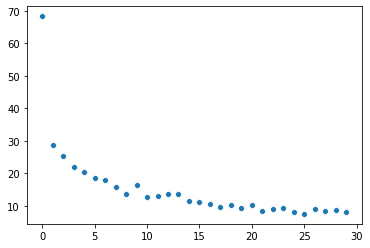

In [135]:
import seaborn as sns
from matplotlib import pyplot as plt

#sns.scatterplot(y=batch_losses, x=range(len(batch_losses)))
sns.scatterplot(y=epoch_losses, x=range(len(epoch_losses)))

In [187]:
correct = 0
total = 0

from torchvision import datasets, transforms

# defineing a transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# downloading and loading the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

n_batches = 1

with torch.no_grad():
    for batch in range(n_batches):
        images, labels = dataiter.next()
        
        out = net(images.view(labels.size(0),-1))
        ps = torch.exp(out)
        
        _, predicted = ps.topk(1, dim=1)
                
        total += labels.size(0)
        #correct += (predicted == labels.view(*predicted.shape)).sum().item()
        
        equals = (predicted == labels.view(*predicted.shape))
        accuracy = torch.mean(equals.type(torch.FloatTensor))
        print(accuracy.item())
        
print('Accuracy of the network on the %d test images: %d %%' % (n_batches*labels.size(0),
    accuracy*100))

0.9375
Accuracy of the network on the 64 test images: 93 %


In [147]:
torch.cuda.is_available() # '-'

False